In [12]:
from BlackScholes import BlackScholes
from Trajectory import Trajectory

import numpy as np

S0 =100
mu = 0.05
r = 0.05
sigma = 0.2

sigma_hedge = 0.2

T = 1
K = 102

Nhedge = 54
Nrep = 1000

St = np.array([S0]*Nrep)
dt = T/Nhedge

initialoutlay = BlackScholes(T=T,strike=K,r=r,q=0,sigma=sigma)
initialoutlay = initialoutlay.valuation(spot=S0)
Vpf = np.array([initialoutlay]* Nrep)

model = BlackScholes(T=T,strike=K,r=r,q=0,sigma=sigma_hedge,option_type='call',greek_type='delta')
a = np.array([model.valuation(s) for s in St.tolist()])
b = Vpf - a*St

from tqdm import tqdm
for i in tqdm(range(1,Nhedge)):
    St = St * np.exp((mu-0.5*sigma**2)*dt +sigma*np.sqrt(dt)*np.random.normal(size=Nrep))	
    Vpf = a * St + b * np.exp(dt*r)    
    #a <- BlackScholesFormula(St,(capT-(i-1)*dt),K, r,0,sigma_hedge,1,2)
    model = BlackScholes(T=T-(i-1)*dt,strike=K, r=r,q=0,sigma=sigma_hedge,option_type='call',greek_type='delta')
    a = np.array([model.valuation(s) for s in St.tolist()])
    b = Vpf - a * St

ST = St*np.exp((mu-0.5*sigma**2)*dt + sigma * np.sqrt(dt)*np.random.normal(size=Nrep))
Vpf = a * ST + b * np.exp(dt*r) 
hedgeerror = (Vpf-np.maximum(ST-K,0))
optionpayoff = np.maximum(ST-K,0)
  
print("Initial investment =",round(initialoutlay,4))
print("Average discounted option payoff =",round(np.exp(-r*T)*np.mean(optionpayoff),4))
print("Average discounted portfolio value =",round(np.exp(-r*T)*np.mean(Vpf),4))

100%|██████████| 53/53 [01:00<00:00,  1.14s/it]

Initial investment = 9.4234
Average discounted option payoff = 9.3074
Average discounted portfolio value = 9.3267


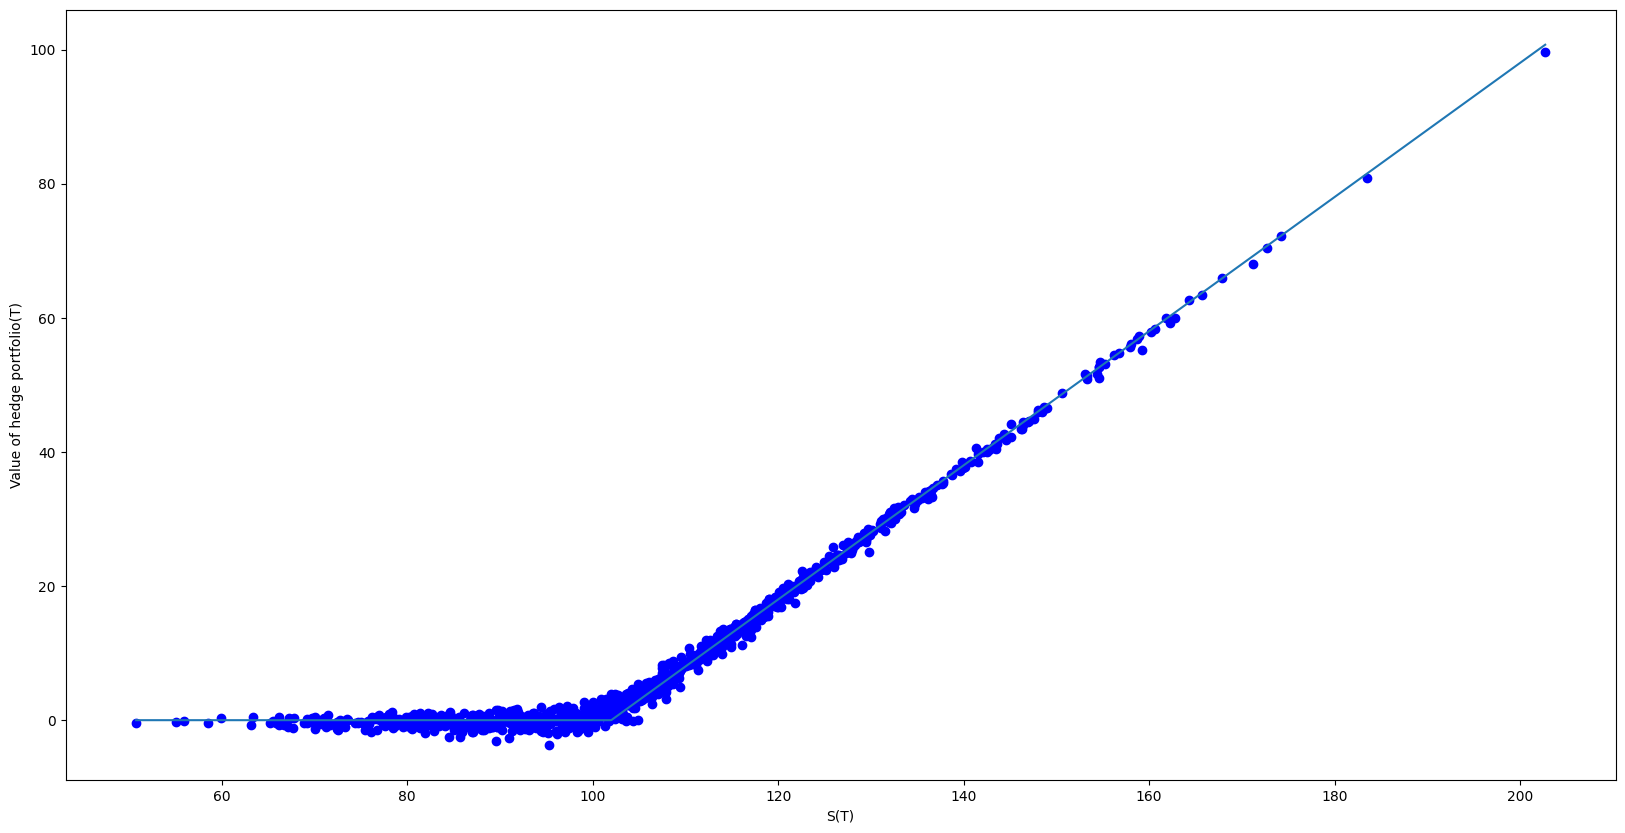

In [14]:

import matplotlib.pyplot as plt 


plt.figure(figsize=(20,10))

plt.scatter(ST,Vpf,label="Discrete hedging of a call option",color='blue')
plt.ylabel("Value of hedge portfolio(T)")
plt.xlabel("S(T)")

x = np.sort(ST)
plt.plot(x,np.maximum(x-K,0))
plt.show()